In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health/Student Mental health.csv


In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [34]:
data_df = pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")
data_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [35]:
data_df = pd.DataFrame(data_df)
data_df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [36]:
data_df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [37]:
data_df.drop(['Timestamp'],axis=1,inplace= True)
data_df.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [38]:
data_df.rename(columns = {'Choose your gender':'Gender','What is your course?':'course','Your current year of Study': 'Acad_Year','What is your CGPA?':'CGPA','Do you have Depression?':'Depression','Do you have Anxiety?':'Anxiety','Do you have Panic attack?':'Panic attack','Did you seek any specialist for a treatment?':'Consulting'}, inplace = True)
data_df.head()

,Gender,Age,course,Acad_Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Consulting
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [39]:
data_df.shape

(101, 10)

In [40]:
data_df.dtypes

Gender             object
Age               float64
course             object
Acad_Year          object
CGPA               object
Marital status     object
Depression         object
Anxiety            object
Panic attack       object
Consulting         object
dtype: object

In [41]:
data_df.isnull().sum()

Gender            0
Age               1
course            0
Acad_Year         0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic attack      0
Consulting        0
dtype: int64

In [42]:
data_df['Age'].fillna(value=data_df['Age'].mean(), inplace=True)
data_df.head()

,Gender,Age,course,Acad_Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Consulting
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [43]:
data_df['Gender'].value_counts()

Gender
Female    75
Male      26
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Count'>

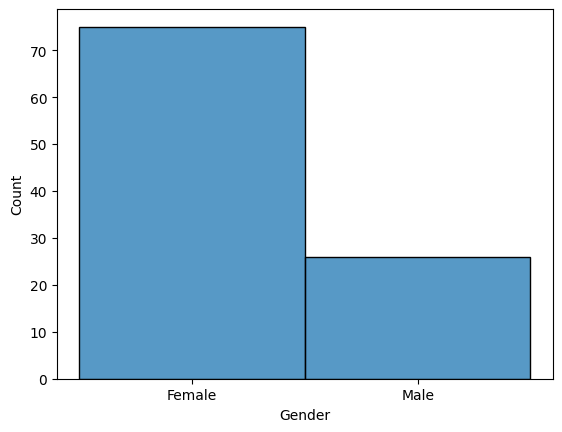

In [46]:
sns.histplot(data_df['Gender'])

In [47]:
data_df.isnull().sum()

Gender            0
Age               0
course            0
Acad_Year         0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic attack      0
Consulting        0
dtype: int64

In [48]:
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 1':1,'Year 1':1})
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 2':2,'Year 2':2})
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 3':3,'Year 3':3})
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 4':4,'Year 4':4})
data_df.head()

,Gender,Age,course,Acad_Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Consulting
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [49]:
data_df['Acad_Year'].value_counts()

Acad_Year
1    43
2    26
3    24
4     8
Name: count, dtype: int64

In [50]:
data_df['Age'].min()

18.0

In [51]:
data_df['Age'].max()

24.0

In [52]:
data_df['course'].value_counts()

course
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Hum

In [53]:
#plt.pyplot.pie(data_df['Gender'])

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


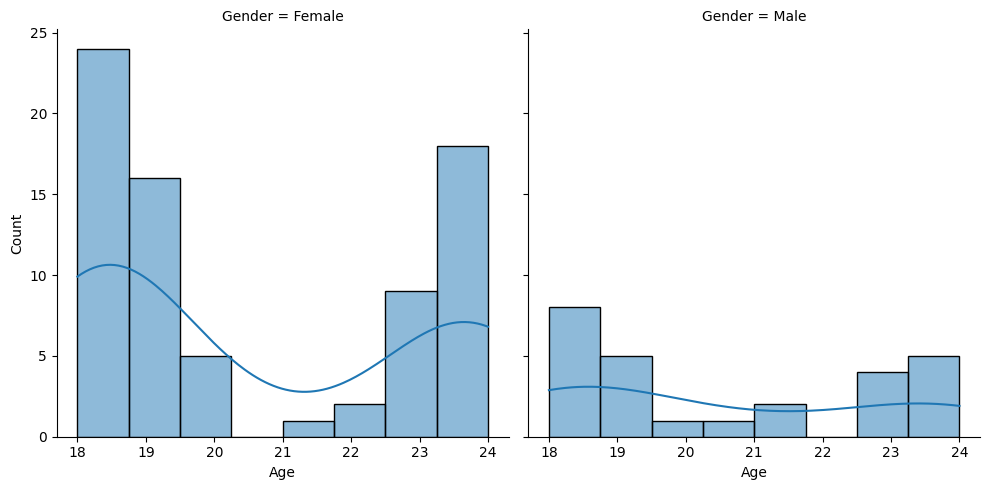

In [55]:
sns.displot(data=data_df, x="Age", col="Gender", kde=True)

In [56]:
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 1':1,'Year 1':1})
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 2':2,'Year 2':2})
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 3':3,'Year 3':3})
data_df['Acad_Year']=data_df['Acad_Year'].replace({'year 4':4,'Year 4':4})
data_df.head()

,Gender,Age,course,Acad_Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Consulting
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


<Axes: xlabel='Acad_Year', ylabel='Marital status'>

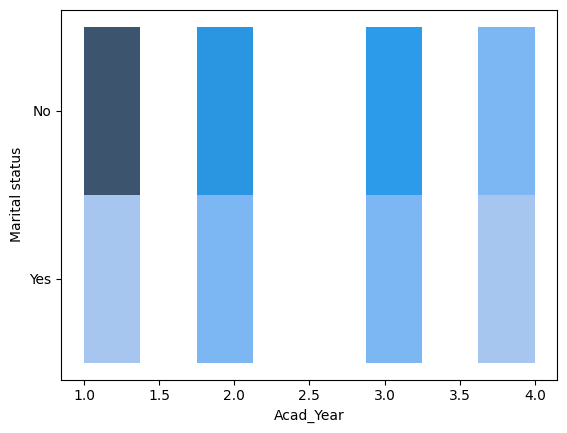

In [57]:
sns.histplot(x = 'Acad_Year',y = 'Marital status',data = data_df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


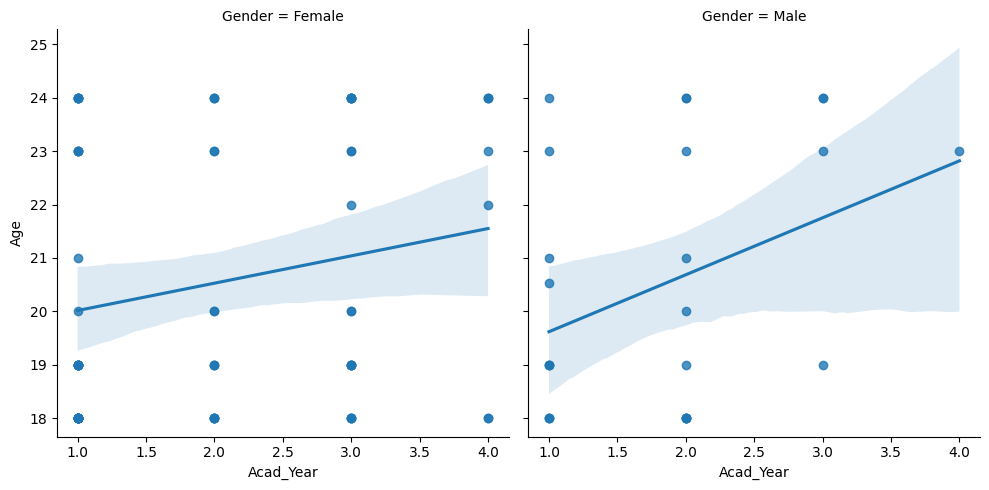

In [58]:
sns.lmplot(data=data_df, x="Acad_Year", y="Age", col="Gender")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


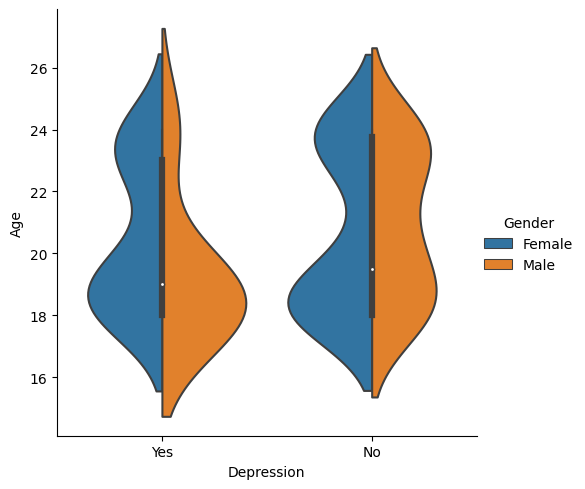

In [59]:
sns.catplot(data=data_df, kind="violin", x="Depression", y="Age", hue="Gender", split=True)

In [61]:
data_df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [63]:
# Encoding columns for better representation
# YES -> 1 & NO-> 0
le = LabelEncoder()
data_df['Marital status'] = le.fit_transform(data_df['Marital status'])
data_df['Depression'] = le.fit_transform(data_df['Depression'])
data_df['Anxiety'] = le.fit_transform(data_df['Anxiety'])
data_df['Panic attack'] = le.fit_transform(data_df['Panic attack'])
data_df['Consulting'] = le.fit_transform(data_df['Consulting'])

data_df.head()

,Gender,Age,course,Acad_Year,CGPA,Marital status,Depression,Anxiety,Panic attack,Consulting
0,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,Male,19.0,BIT,1,3.00 - 3.49,0,1,1,1,0
3,Female,22.0,Laws,3,3.00 - 3.49,1,1,0,0,0
4,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


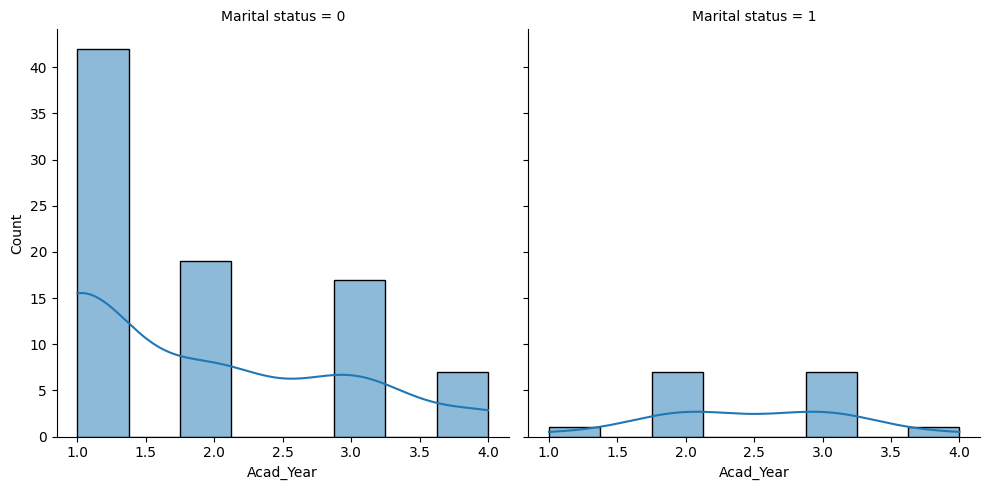

In [64]:
sns.displot(data=data_df, x="Acad_Year", col="Marital status", kde=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


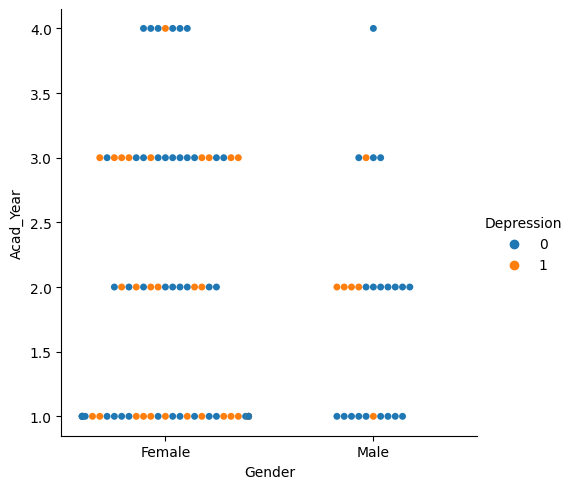

In [66]:
sns.catplot(data=data_df, kind="swarm", x="Gender", y="Acad_Year", hue="Depression")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


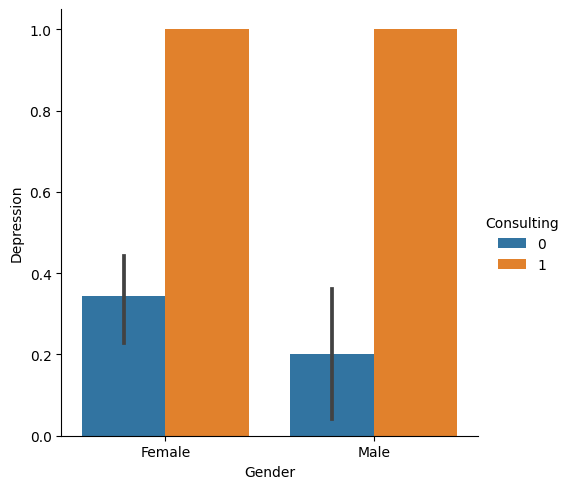

In [67]:
sns.catplot(data=data_df, kind="bar", x="Gender", y="Depression", hue="Consulting")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


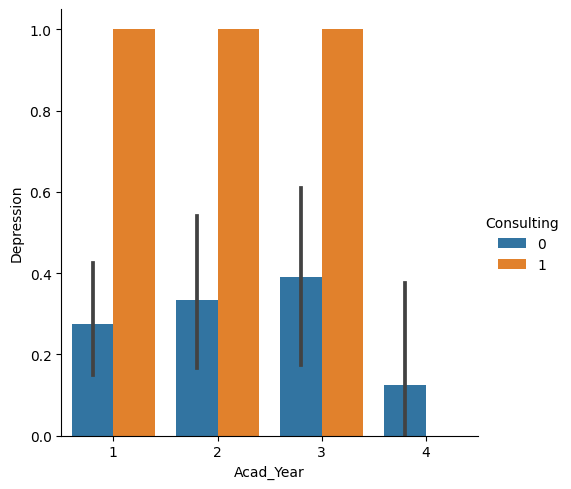

In [68]:
sns.catplot(data=data_df, kind="bar", x="Acad_Year", y="Depression", hue="Consulting")

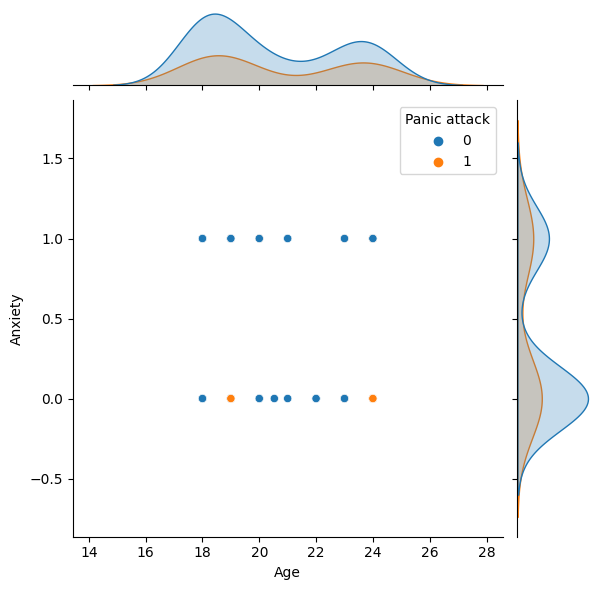

In [70]:
sns.jointplot(data=data_df, x="Age", y="Anxiety", hue="Panic attack")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


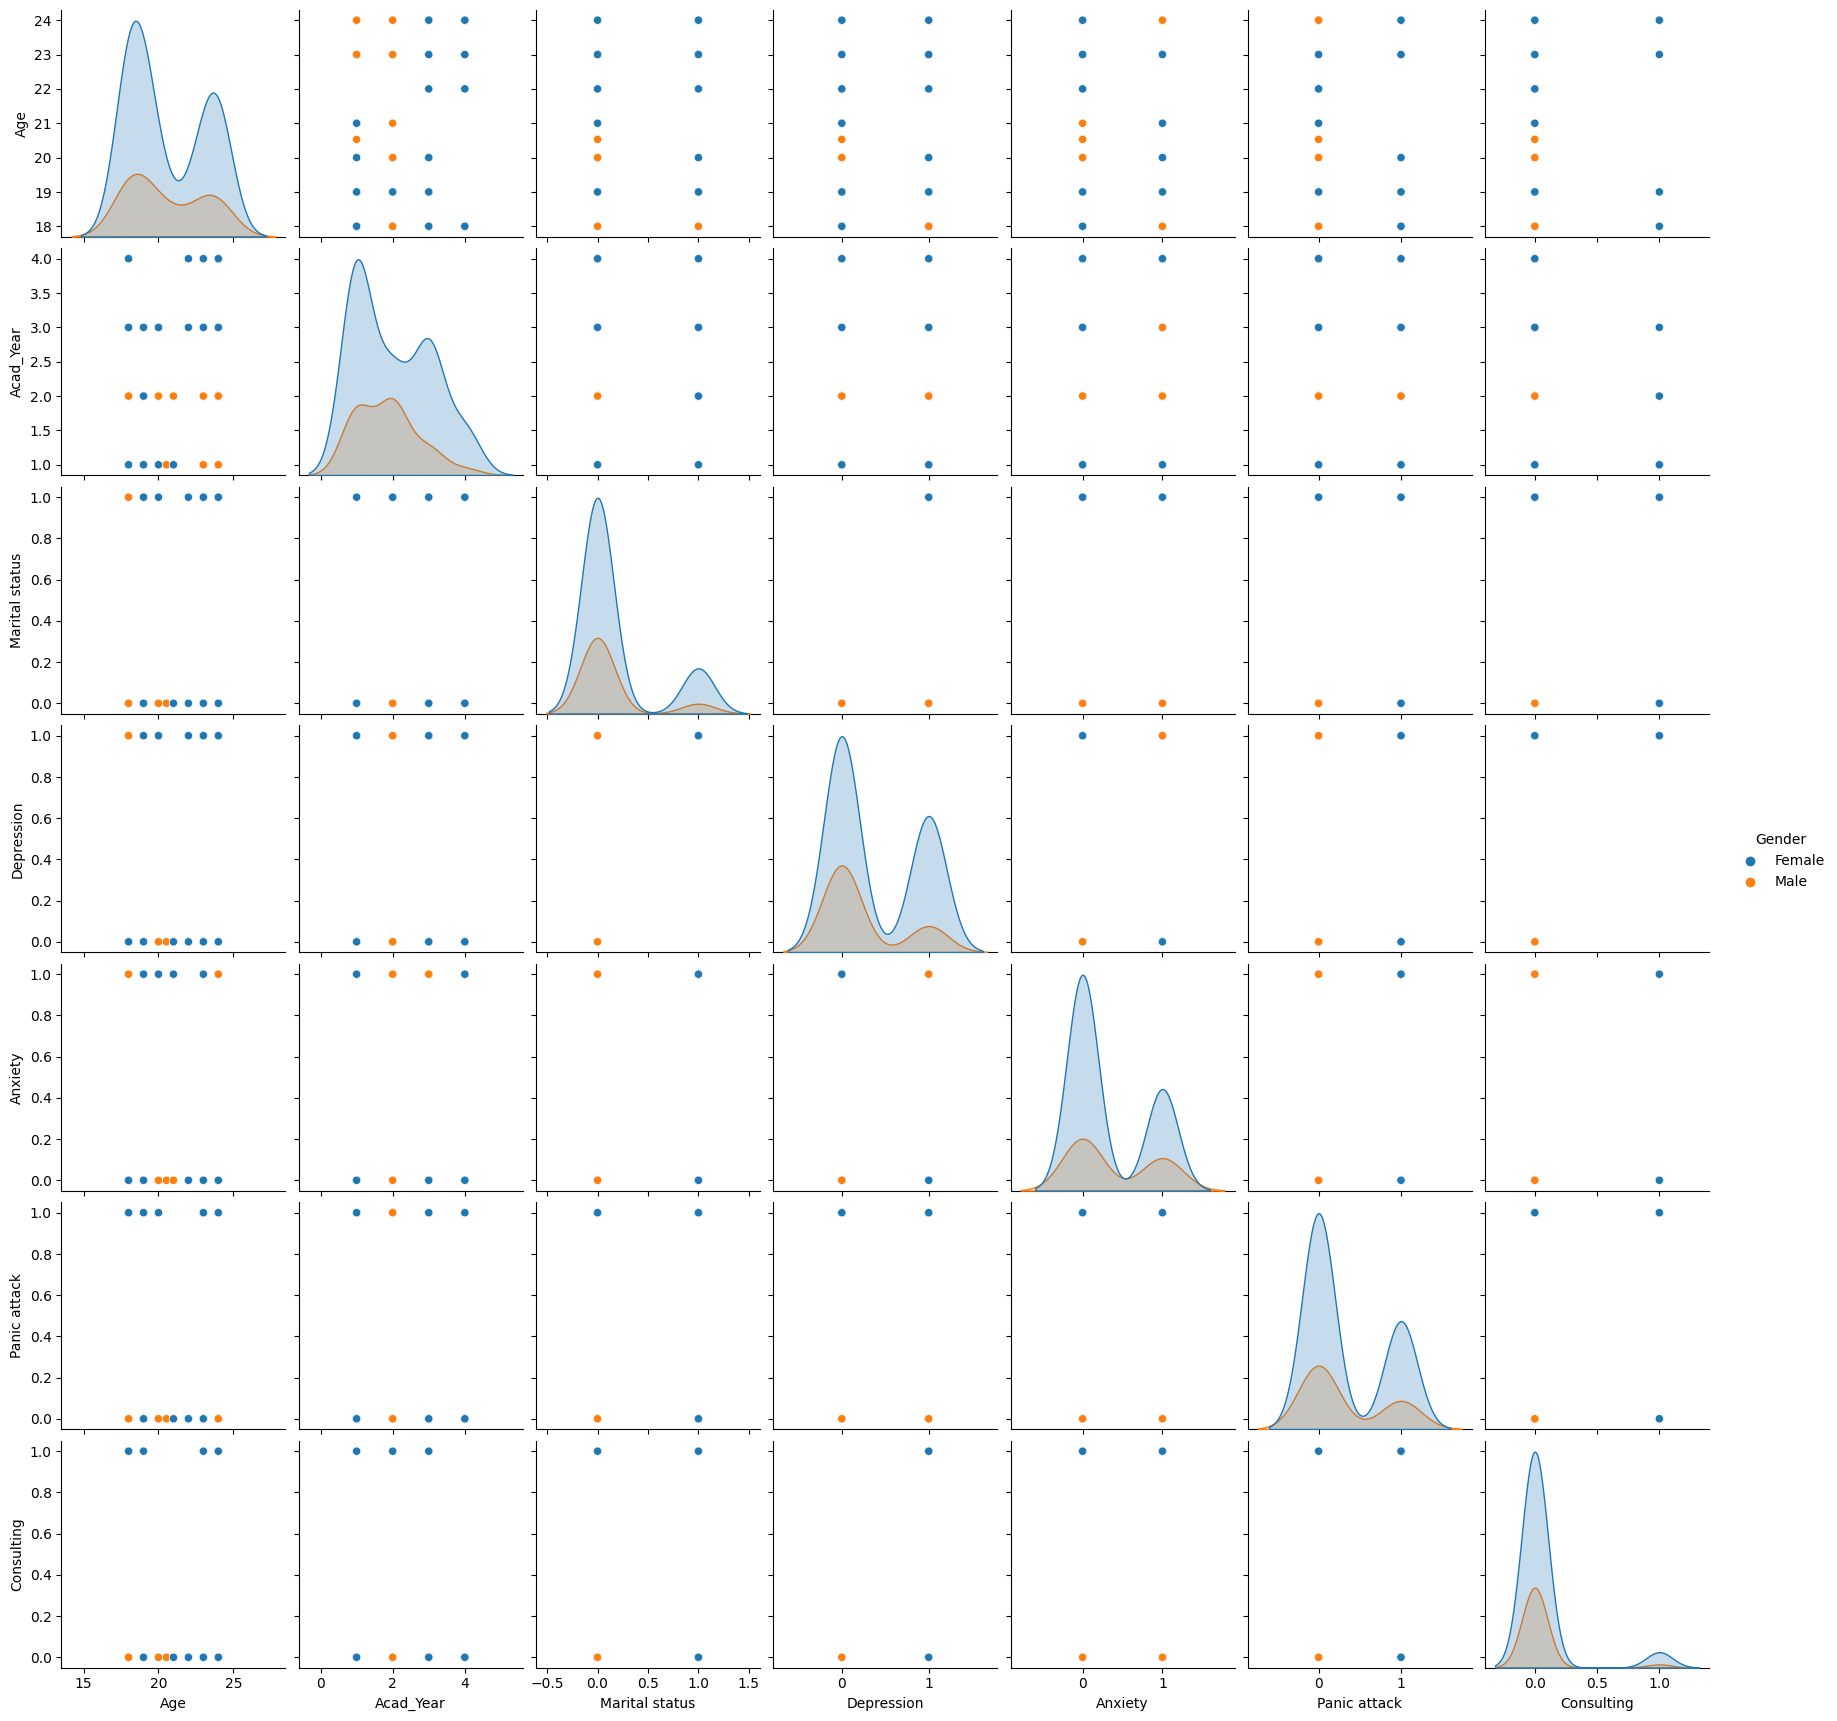

In [72]:
sns.pairplot(data=data_df, hue="Gender")